In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
from google.colab import files
files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv
Saving Train_SU63ISt.csv to Train_SU63ISt.csv


{'Test_0qrQsBZ.csv': b'ID,Datetime\r\n18288,26-09-2014 00:00\r\n18289,26-09-2014 01:00\r\n18290,26-09-2014 02:00\r\n18291,26-09-2014 03:00\r\n18292,26-09-2014 04:00\r\n18293,26-09-2014 05:00\r\n18294,26-09-2014 06:00\r\n18295,26-09-2014 07:00\r\n18296,26-09-2014 08:00\r\n18297,26-09-2014 09:00\r\n18298,26-09-2014 10:00\r\n18299,26-09-2014 11:00\r\n18300,26-09-2014 12:00\r\n18301,26-09-2014 13:00\r\n18302,26-09-2014 14:00\r\n18303,26-09-2014 15:00\r\n18304,26-09-2014 16:00\r\n18305,26-09-2014 17:00\r\n18306,26-09-2014 18:00\r\n18307,26-09-2014 19:00\r\n18308,26-09-2014 20:00\r\n18309,26-09-2014 21:00\r\n18310,26-09-2014 22:00\r\n18311,26-09-2014 23:00\r\n18312,27-09-2014 00:00\r\n18313,27-09-2014 01:00\r\n18314,27-09-2014 02:00\r\n18315,27-09-2014 03:00\r\n18316,27-09-2014 04:00\r\n18317,27-09-2014 05:00\r\n18318,27-09-2014 06:00\r\n18319,27-09-2014 07:00\r\n18320,27-09-2014 08:00\r\n18321,27-09-2014 09:00\r\n18322,27-09-2014 10:00\r\n18323,27-09-2014 11:00\r\n18324,27-09-2014 12:00\r\n

In [3]:
train=pd.read_csv('Train_SU63ISt.csv')
test=pd.read_csv('Test_0qrQsBZ.csv')

In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [6]:
trainseries=train.squeeze()
testseries=test.squeeze()
print(type(trainseries))
print(type(testseries))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
trainseries.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
testseries.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


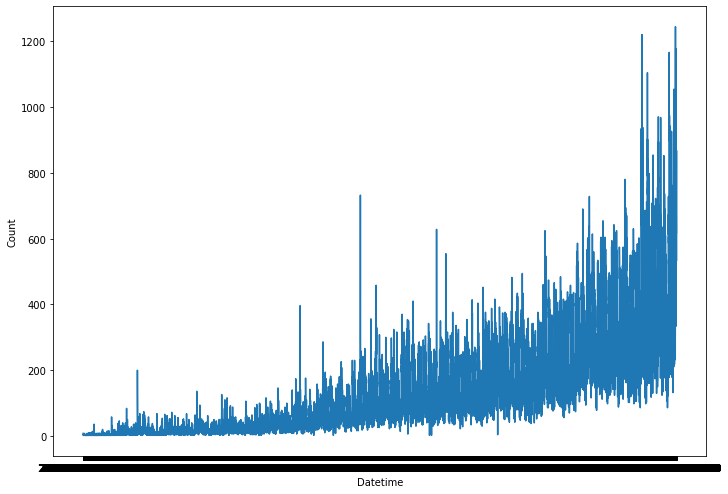

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=trainseries, x='Datetime', y='Count')

In [13]:
trainseries['date']=pd.to_datetime(trainseries['Datetime'])
testseries['date']=pd.to_datetime(trainseries['Datetime'])

In [16]:
trainseries=trainseries.drop(labels=['ID','Datetime'],axis=1)
testseries=testseries.drop(labels=['Datetime'],axis=1)

In [9]:
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.all import *
import sktime.utils.plotting as sk

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Count'>)

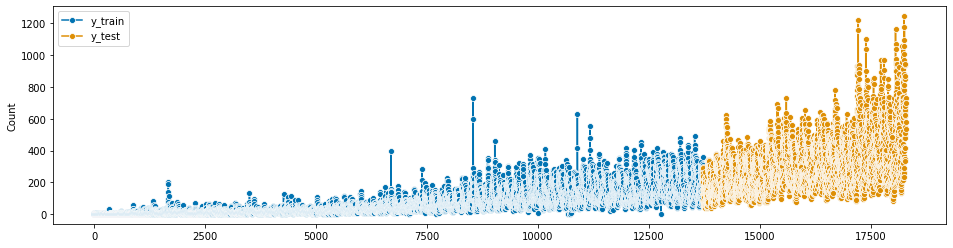

In [10]:
y_train, y_test = temporal_train_test_split(trainseries['Count'].sort_index())
sk.plot_series(y_train, y_test, labels=["y_train", "y_test"])


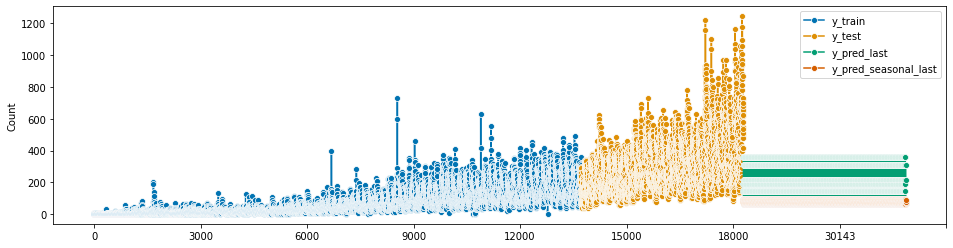

In [97]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mape_loss

naive_forecaster_last = NaiveForecaster(strategy="last",sp=12)
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(y_test.index)

naive_forecaster_seasonal = NaiveForecaster(strategy="mean", sp=12)
naive_forecaster_seasonal.fit(y_train)
y_seasonal_last = naive_forecaster_seasonal.predict(y_test.index)

sk.plot_series(y_train, y_test, y_last, y_seasonal_last, labels=["y_train", "y_test", "y_pred_last", "y_pred_seasonal_last"]);


In [98]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
y_last=np.array(y_last)
y_test=np.array(y_test)
print(np.sqrt(mean_squared_log_error(y_test,y_last)))

1.0670008164939544


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2fa1acd10>)

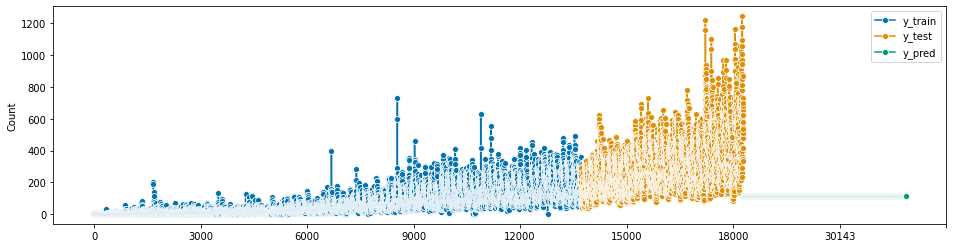

In [125]:
from sktime.forecasting.compose import ReducedForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss

regressor = RandomForestRegressor(n_estimators=856, criterion='mse', max_depth=10)
forecaster = ReducedForecaster(regressor, window_length=12,scitype='regressor')
forecaster.fit(y_train)
y_pred = forecaster.predict(y_test.index)

sk.plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

In [126]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
y_last=np.array(y_pred)
y_test=np.array(y_test)
print(np.sqrt(mean_squared_error(y_test,y_last)))

268.9042309986659


In [ ]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(y_test.index)
sk.plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
y_last=np.array(y_pred)
y_test=np.array(y_test)
print(np.sqrt(mean_squared_error(y_test,y_last)))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Count'>)

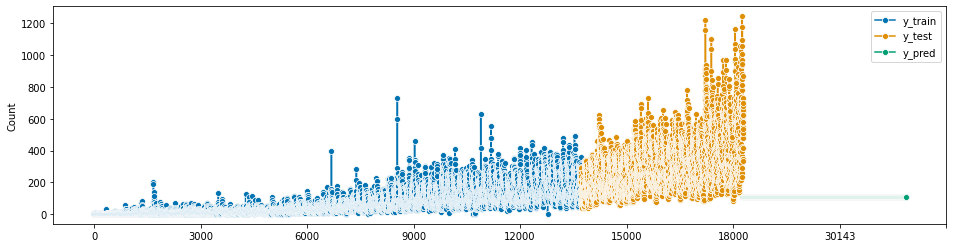

In [12]:
from sktime.forecasting.compose import RecursiveRegressionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split


regressor = RandomForestRegressor(n_estimators=856, criterion='mse', max_depth=10)
forecaster = RecursiveRegressionForecaster(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(y_test.index)

sk.plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])


In [13]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
y_last=np.array(y_pred)
y_test=np.array(y_test)
print(np.sqrt(mean_squared_error(y_test,y_last)))

273.0880605001554
